# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Using data.loc to filter a pandas DataFrame
data.loc[[50, 150, 250, 350],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
50,6269,1095,1980,3860,609,2162
150,16225,1825,1765,853,170,1067
250,3191,1993,1799,1730,234,710
350,3521,1099,1997,1796,173,995


In [4]:
# Fresh filter using data.loc 
fresh_q1 = 3127.750000
display(data.loc[data.Fresh < fresh_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [5]:
fresh_q3 = 16933.750000
display(data.loc[data.Fresh > fresh_q3, :].head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
4,22615,5410,7198,3915,1777,5185
12,31714,12319,11757,287,3881,2931
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168
18,18601,6327,10099,2205,2767,3181
20,17546,4519,4602,1066,2259,2124
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
24,22647,9776,13792,2915,4482,5778
29,43088,2100,2609,1200,1107,823


In [6]:
# Milk filter samples lower than Q1
milk_q1 = 1533.000000
display(data.loc[data.Milk < milk_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,13265,1196,4221,6404,507,1788
11,13146,1124,4523,1420,549,497
15,10253,1114,3821,397,964,412
21,5567,871,2010,3383,375,569
26,9898,961,2861,3151,242,833


In [7]:
# Milk filter samples lower than Q1
milk_q3 = 7190.250000
display(data.loc[data.Milk > milk_q3, :].head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
5,9413,8259,5126,666,1795,1451
9,6006,11093,18881,1159,7425,2098
12,31714,12319,11757,287,3881,2931
14,24653,9465,12091,294,5058,2168
16,1020,8816,12121,134,4508,1080
23,26373,36423,22019,5154,4337,16523
24,22647,9776,13792,2915,4482,5778


In [8]:
# Grocery filter
grocery_q1 = 2153.000000
display(data.loc[data.Grocery < grocery_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
21,5567,871,2010,3383,375,569
39,56159,555,902,10002,212,2916
50,6269,1095,1980,3860,609,2162
54,27329,1449,1947,2436,204,1333
58,13779,1970,1648,596,227,436


In [9]:
grocery_q3 = 10655.750000
display(data.loc[data.Grocery > grocery_q3, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
9,6006,11093,18881,1159,7425,2098
10,3366,5403,12974,4400,5977,1744
12,31714,12319,11757,287,3881,2931
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168


In [10]:
# Frozen filter
frozen_q1 = 742.250000
display(data.loc[data.Frozen < frozen_q1, :].head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931
14,24653,9465,12091,294,5058,2168
15,10253,1114,3821,397,964,412
16,1020,8816,12121,134,4508,1080
19,7780,2495,9464,669,2518,501
25,16165,4230,7595,201,4003,57


In [11]:
frozen_q3 = 3554.250000
display(data.loc[data.Frozen > frozen_q3, :].head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916
40,24025,4332,4757,9510,1145,5864
47,44466,54259,55571,7782,24171,6465
50,6269,1095,1980,3860,609,2162


In [12]:
# Detergents_Paper filter
dtp_q1 = 256.750000
display(data.loc[data.Detergents_Paper < dtp_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
26,9898,961,2861,3151,242,833
27,14276,803,3045,485,100,518
39,56159,555,902,10002,212,2916
54,27329,1449,1947,2436,204,1333
58,13779,1970,1648,596,227,436


In [13]:
dtp_q3 = 3922.000000
display(data.loc[data.Detergents_Paper > dtp_q3, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
9,6006,11093,18881,1159,7425,2098
10,3366,5403,12974,4400,5977,1744
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168
16,1020,8816,12121,134,4508,1080


In [14]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [12, 23, 39]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,26373,36423,22019,5154,4337,16523
2,56159,555,902,10002,212,2916


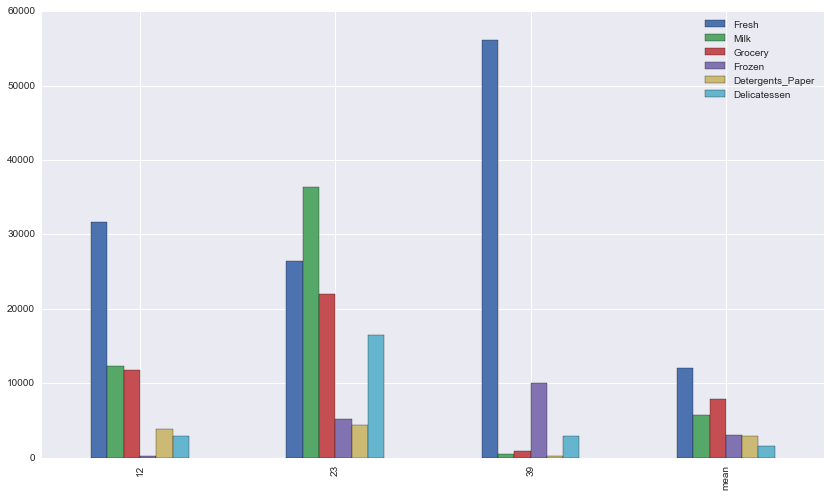

In [15]:
# Import Seaborn for Data Visualisation
import seaborn as sns

# Get the means 
mean_data = data.describe().loc['mean', :]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,8))

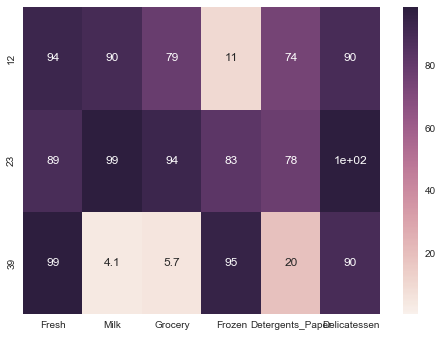

In [16]:
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

*Index 12:  Upscale Restaurant 

* Fresh:   > Mean, > Q3(75%)
* Milk:  > Mean, > Q3 (75%)
* Grocery:  > Mean, > Q3 (75%)
* Frozen:  < Mean, < Q1 (25%)
* Detergents Paper:  > Mean, < Q3(75%)
* Delicatessen:  > Mean, > Q3(75%)

This could be a restaurant with almost no spending on frozen food. 
            
Index 23: Retail store

* Fresh:   > Mean, > Q3(75%)
* Milk:  > Mean, > Q3 (75%)
* Grocery:  > Mean, > Q3 (75%)
* Frozen:  > Mean, > Q3 (75%)
* Detergents Paper:  > Mean, > Q3(75%)
* Delicatessen:  > Mean, > Q3(75%)

Average amount of spending on all categories. This customer could be a small, independent, and family-owned business.                     

Index 39: Fresh Food Retail store

* Fresh:   > Mean, > Q3(75%)
* Milk:  < Mean,  < Q1 (25%)
* Grocery:  < Mean, < Q1 (25%)
* Frozen:  > Mean, > Q3 (75%)
* Detergents Paper:  < Mean, < Q1(25%)
* Delicatessen:  > Mean, > Q3(75%)

Majority of spending is on "Fresh" goods.   This customer could be a fresh food retail store specializing in selling fresh goods with some frozen foods.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [17]:
# Existing features
data.columns

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Create list to loop through
dep_vars = list(data.columns)

# Create loop to test each feature as a dependent variable
for var in dep_vars:

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)

# Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])

# TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
# Instantiate
    regressor = DecisionTreeRegressor(random_state=42)
# Fit
    regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))


R2 score for Fresh as dependent variable: -0.385749710204
R2 score for Milk as dependent variable: 0.156275395017
R2 score for Grocery as dependent variable: 0.681884008544
R2 score for Frozen as dependent variable: -0.210135890125
R2 score for Detergents_Paper as dependent variable: 0.271666980627
R2 score for Delicatessen as dependent variable: -2.2547115372


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:
I attempted to predict every single feature as a dependent variable using a 'for' loop. As shown above, "Fresh", "Frozen" and "Delicatessen" have negative R2 scores indicating that these features are necessary for identifying customers' spending habits because the model fails to fit the data. Likewise, "Milk" and "Detergents_Paper" have very low R2 scores implying that they are necessary for identifying customer's spending habits.  However, "Grocery" has a R2 score of 0.68, which is comparatibly higher score than other features. This feature may not be necesary for identifying customers' spending habits. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

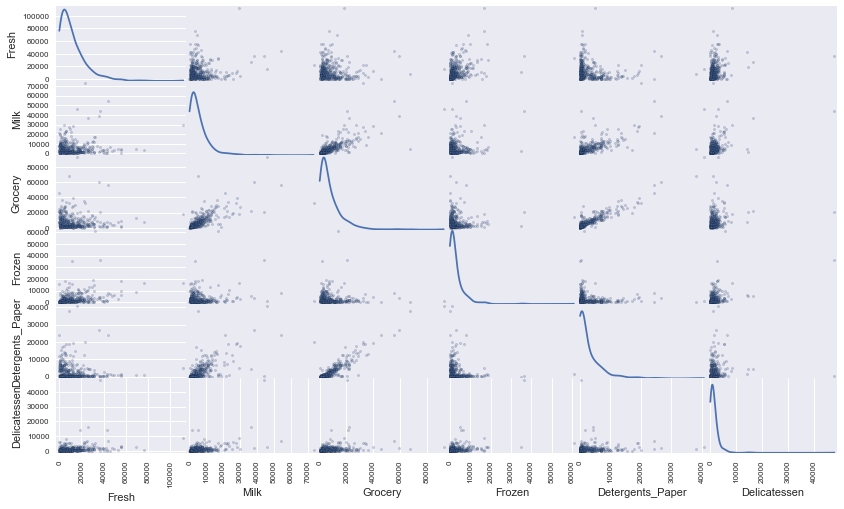

In [19]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

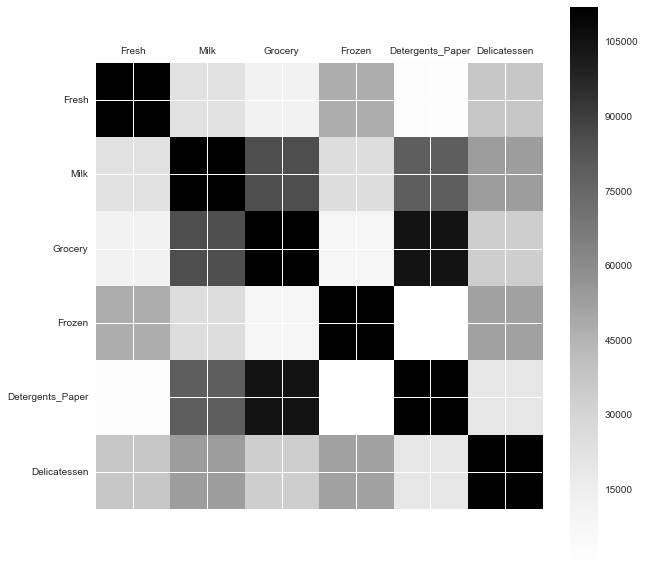

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(data)

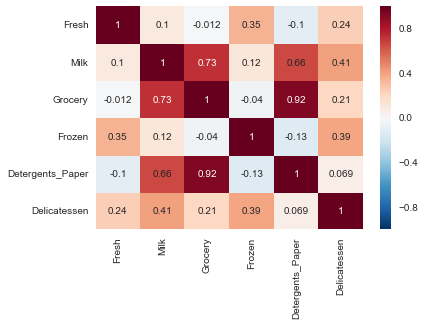

In [21]:
sns.heatmap(data.corr(), annot = 'True')

In [22]:
from scipy import stats
for col in data.columns:
    # For normally distributed data, the skewness should be about 0. 
    # skewness value > 0 means more weight in left tail of the distribution.
    print '"{}" skew: {:.4f}'.format(col, stats.skew(data[col], axis=0))

"Fresh" skew: 2.5526
"Milk" skew: 4.0399
"Grocery" skew: 3.5752
"Frozen" skew: 5.8878
"Detergents_Paper" skew: 3.6195
"Delicatessen" skew: 11.1135


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:   As shown in a scatter matrix and a correlation matrix above, I have ranked a pair of features that exhibit some degree of correlations from strongest to weakest.   

* Grocery and Detergents_Paper (92%)
* Grocery and Milk (73%)
* Detergents_Paper and Milk (66%)
* Milk and Delicatessen (41%)
* Frozen and Fresh (35%)
        
Above pairs of features confirm my initial claim that Grocery may not be necessary for identifying customers' spending habits. Grocery has a high correlation with Detergents_Paper and Milk that corresponds to a relatively high R2 score than other pairs of features.  In addition, the distributions of data features are mostly positively skewed (right-skewed) where most of the data points lie.  The normalization of data features is required for using a clustering algorithm as shown below.    

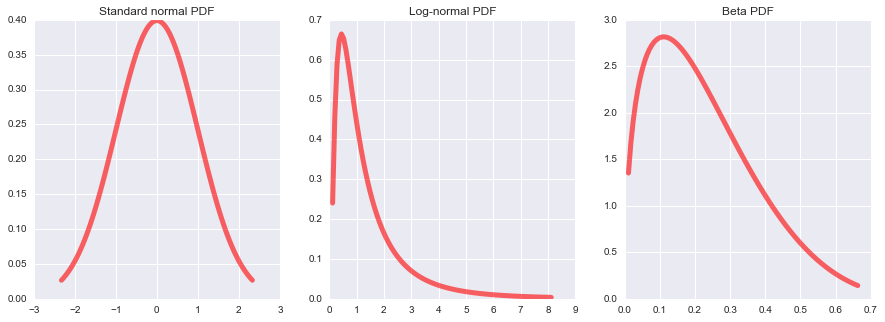

In [23]:
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import beta
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

def plot_norm(ax):
    ax.set_title("Standard normal PDF")
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
    ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6)

def plot_lognorm(ax, shape):
    ax.set_title("Log-normal PDF")
    x = np.linspace(lognorm.ppf(0.01, shape), lognorm.ppf(0.99, shape), 100)
    ax.plot(x, lognorm.pdf(x, shape), 'r-', lw=5, alpha=0.6)

def plot_beta(ax, a, b):
    ax.set_title("Beta PDF")
    x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
    ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6)

plot_norm(ax1)
plot_lognorm(ax2, 0.9)
plot_beta(ax3, 1.5, 5.0)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

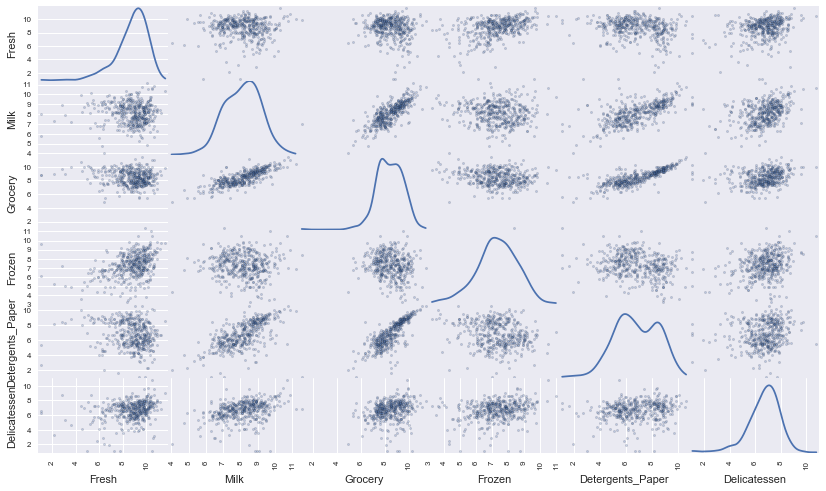

In [24]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

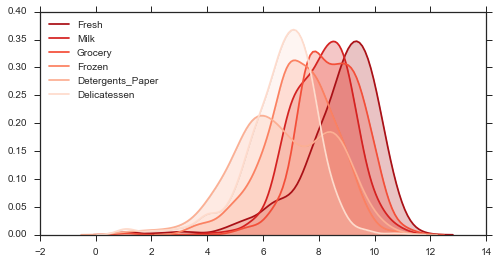

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [25]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
1,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


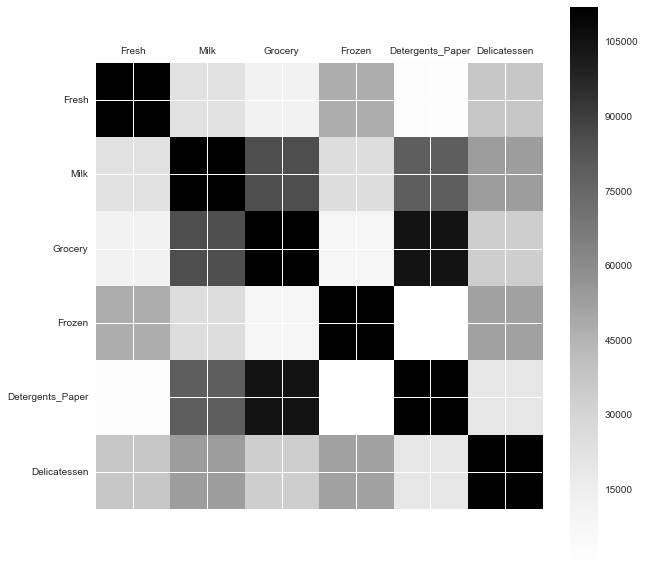

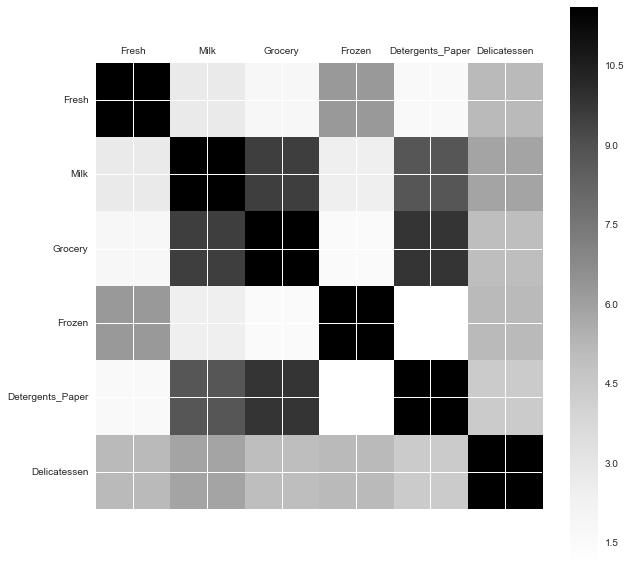

In [26]:
plot_corr(data)
plot_corr(log_data)

** Changes in correlations:  Fresh, Grocery and Detergents_Paper have a slightly stronger correlation with Delicatessen.


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [27]:
# This is how np.percentile would work
# np.percentile[series, percentile]
np.percentile(data.loc[:, 'Milk'], 25)

1533.0

In [28]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:   There are 5 data points that have appeared as duplicates and outliers:  [65, 66, 75, 128, 154]. In general, we need to remove duplicates that are outliers from the dataset because they can affect both results and misleading assumptions of the data distribution.  For instance, if we leave outliers in the dataset, they are likely to form outlier clusters including some data points from the boudaries of the real dataset.  This can have a huge impact on data association and result in shifting R^2 value as well. **

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

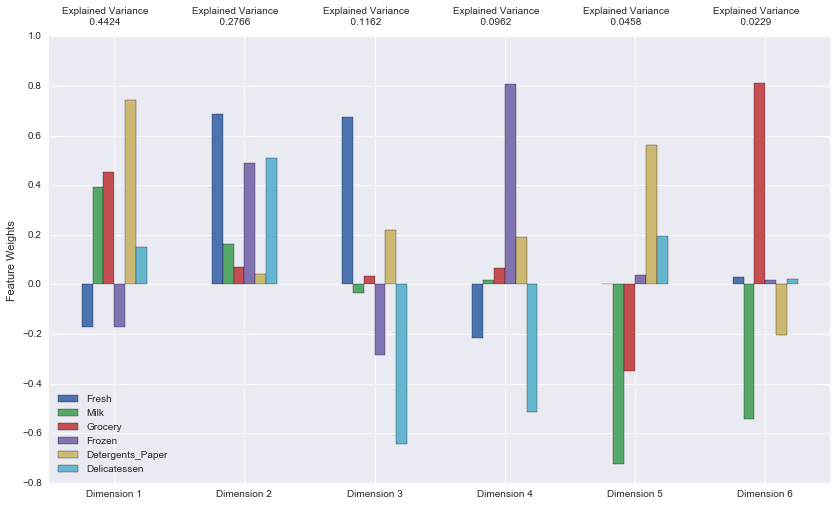

In [29]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features

# Instantiate
pca = PCA(n_components=6)

# Fit
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [30]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4424,-0.1737,0.3945,0.4544,-0.1722,0.7455,0.1494
Dimension 2,0.2766,0.6851,0.1624,0.0694,0.4877,0.0419,0.5097
Dimension 3,0.1162,0.6735,-0.0331,0.0322,-0.2848,0.2182,-0.6446
Dimension 4,0.0962,-0.2143,0.0186,0.0645,0.8061,0.1901,-0.5135
Dimension 5,0.0458,0.0008,-0.7223,-0.3480,0.0362,0.5637,0.1954
Dimension 6,0.0229,0.0293,-0.5430,0.8139,0.0174,-0.2024,0.0228


pandas.core.frame.DataFrame

Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Dimension 5    0.9772
Dimension 6    1.0001
Name: Explained Variance, dtype: float64

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer: 

71.9% of the variance in the data is explained by the first and second principal components (0.7190 = 0.4424+0.2766).  And 93.14% of the variance in the data is explained by the first four principal components.

Here is a breakdown of the first four principal components:
        
* The first principal component (PC1):  Explained Variance = 0.4424

PC1 has highly postive weights on "Milk", "Grocery" and "Detergents_Paper" spending and negative weights on "Fresh" and "Frozen".  This component might represent spending habits of householder that "Milk", "Grocery" and "Detergents_Paper" are purchased together.
     
* The second principal component (PC2):  Explained Variance = 0.2766
     
PC2 shows a large increase in "Fresh", "Frozen" and "Delicatessen" spending.  This pattern might represent spending habits of retailer who does not spend houehold items.
     
* The third principal component (PC3):  Explained Variance = 0.1162

PC3 shows a large increase in "Fresh" and a large decrease in "Delicatessen" spending. This pattern might represent spending habits of fresh food retailer who has simiar pattern with PC2 except spending on "Frozen" and "Delicatessen".
    
* The fourth principal component (PC4):  Explained Variance = 0.0962

PC4 has highly positive weights on "Frozen" and "Detergent_Paper" and negative weights on "Fresh" and "Delicatessen" spending.  This component represents spending hibits similar to PC2 except "Fresh" and "Delicatessen".

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [31]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.2326,1.3278,1.0282,-1.9855,-0.2291,-0.1969
1,2.8213,3.7157,-1.0248,-0.4243,-0.7254,-0.2129
2,-3.0358,2.6451,-0.2097,-0.0185,1.3929,0.0638


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [32]:
# TODO: Apply PCA by fitting the good data with only two dimensions

# Instantiate
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [33]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.2326,1.3278
1,2.8213,3.7157
2,-3.0358,2.6451


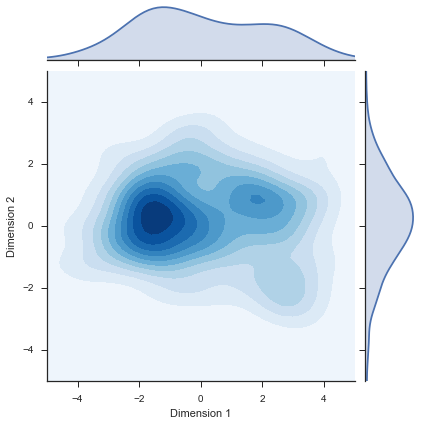

In [47]:
import seaborn as sns
g = sns.JointGrid("Dimension 1","Dimension 2",reduced_data,xlim=(-5,5),ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True)
g = g.plot_marginals(sns.kdeplot, shade=True)

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

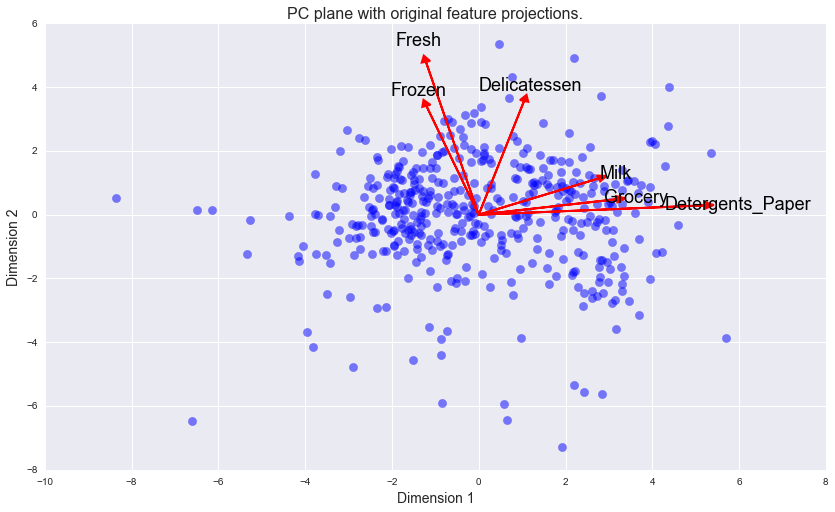

In [34]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer: 

K-Means clustering is considered as a hard assignment algorithm that each data point explicitly belongs to its closest cluster in terms of Euclidian distance.  The goal of this algorithm is to minimize the distance within the same cluster while treating distances in all directions equally.  The advantages of this algorithm is fast and easy to implement compared to Gaussian Mixture Models (GMMs).  But K-means can be computationally expensive to compute all euclidean distances and requires preprocessings of the data to eliminate any susceptible outliers.  In contrast, Gaussian Mixture Model is considered as a soft assignment that there is no definite assignment of points to clusters.  This gives a greater flexibility to the clusters having unconstrained covariances and allows mixture components (each point can belong to two clusters with its probability.  But this can be more complicated to interpret than K-Means clustering and may converge to a local optima, not a global minimum. 

In this submission, I would choose GMM first because of its flexibility of cluster assignment and the size of dataset does not seem to be large enough to use K-means.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [35]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
# Create range of clusters 

range_n_clusters = list(range(2,11))
range_n_clusters

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [37]:
# Use loop through cluster -- GMM Implementation

for n_clusters in range_n_clusters:
    
# TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components = 2).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds =  clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print "For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score)

For n_clusters = 2. The average silhouette_score is : 0.319166126082
For n_clusters = 3. The average silhouette_score is : 0.319166126082
For n_clusters = 4. The average silhouette_score is : 0.319166126082
For n_clusters = 5. The average silhouette_score is : 0.319166126082
For n_clusters = 6. The average silhouette_score is : 0.319166126082
For n_clusters = 7. The average silhouette_score is : 0.319166126082
For n_clusters = 8. The average silhouette_score is : 0.319166126082
For n_clusters = 9. The average silhouette_score is : 0.319166126082
For n_clusters = 10. The average silhouette_score is : 0.319166126082


In [38]:
# Loop through clusters -- KNN Implementation

for n_clusters in range_n_clusters:
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=2).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print "For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score)


For n_clusters = 2. The average silhouette_score is : 0.419166083203
For n_clusters = 3. The average silhouette_score is : 0.419166083203
For n_clusters = 4. The average silhouette_score is : 0.419166083203
For n_clusters = 5. The average silhouette_score is : 0.419166083203
For n_clusters = 6. The average silhouette_score is : 0.419710620309
For n_clusters = 7. The average silhouette_score is : 0.419166083203
For n_clusters = 8. The average silhouette_score is : 0.419166083203
For n_clusters = 9. The average silhouette_score is : 0.419166083203
For n_clusters = 10. The average silhouette_score is : 0.419166083203


7 clusters: 0.35191
6 clusters: 0.36017
5 clusters: 0.34388
4 clusters: 0.33023
3 clusters: 0.39368
2 clusters: 0.41917


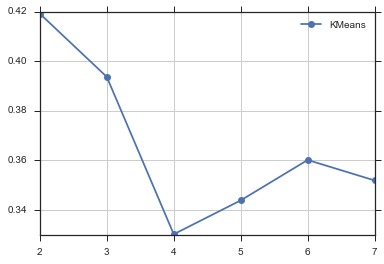

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#keep the scores for each cluster size
sil_scores = []
for i in range(7,1,-1):
    clusterer = KMeans(i, random_state=0).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data, preds)

    # print the score and append to the list of scores
    print i, 'clusters:', score.round(5)
    sil_scores.append(score)

# plot the scores
import matplotlib.pyplot as plt
plt.plot(np.arange(7,1,-1), sil_scores, '-o', label=clusterer.__class__.__name__)
plt.grid(True)
plt.legend(loc='best');

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:* KNN has better silhouette score compared to GMM. As shown above, K=2 gives the best silhouetter score for KNN using a for loop.  

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

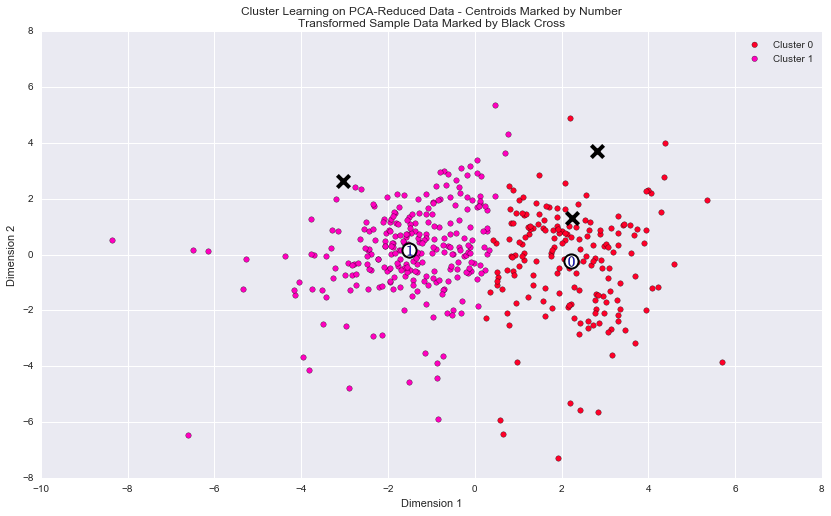

In [39]:
# Display the results of the clustering from implementation

vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [40]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3570.0,7749.0,12463.0,900.0,4567.0,966.0
Segment 1,8994.0,1909.0,2366.0,2081.0,290.0,681.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [41]:
# Clusters' deviation from median
print "True Center: "
display(true_centers)

print "Compared to the Median: "
display(true_centers - data.median())

# Clusters' deviation from mean
print "compared to the Mean: "
display(true_centers - data.mean())

True Center: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3570.0,7749.0,12463.0,900.0,4567.0,966.0
Segment 1,8994.0,1909.0,2366.0,2081.0,290.0,681.0


Compared to the Median: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-4934.0,4122.0,7707.5,-626.0,3750.5,0.5
Segment 1,490.0,-1718.0,-2389.5,555.0,-526.5,-284.5


compared to the Mean: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-8430.297727,1952.734091,4511.722727,-2171.931818,1685.506818,-558.870455
Segment 1,-3006.297727,-3887.265909,-5585.277273,-990.931818,-2591.493182,-843.870455


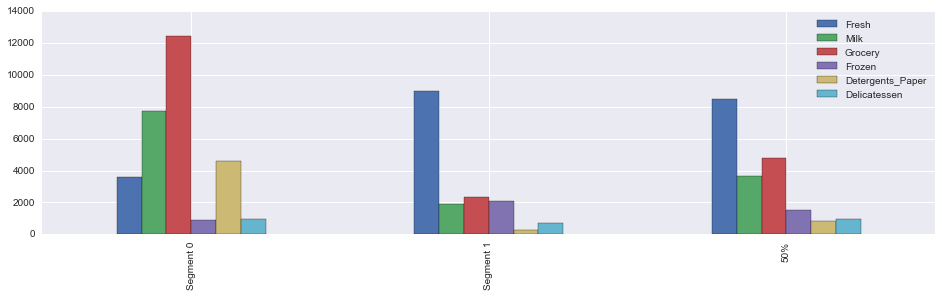

In [42]:
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16,4))

**Answer:   The average customer in Segment 1 has above average spending on Milk, Grocery and Detergents_Paper. This pattern of cluster could represent retails while Segment 0 showing the opposite spending habits by having far below the average in those categories mentioned above except Fresh items. Segment 0 could represent a restaurant selling mostly on Fresh food.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [43]:
# Display the predictions
for i, (pred) in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [44]:
# Display the predictions
for i, (pred, sample) in enumerate(zip(sample_preds, data.values)):
    print "Sample point", i, "predicted to be in Cluster", pred
    print "Data for this sample: ", sample
    print "-----"

Sample point 0 predicted to be in Cluster 0
Data for this sample:  [12669  9656  7561   214  2674  1338]
-----
Sample point 1 predicted to be in Cluster 0
Data for this sample:  [7057 9810 9568 1762 3293 1776]
-----
Sample point 2 predicted to be in Cluster 1
Data for this sample:  [6353 8808 7684 2405 3516 7844]
-----


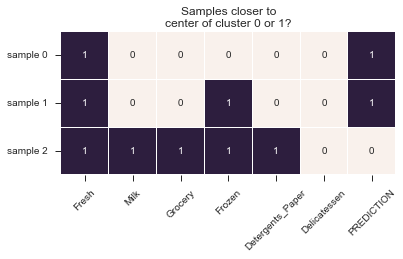

In [50]:
# check if samples' spending closer to segment 0 or 1
df_diffs = (np.abs(samples-true_centers.iloc[0]) < np.abs(samples-true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)

# see how cluster predictions align with similariy of spending in each category
df_preds = pd.concat([df_diffs, pd.Series(sample_preds, name='PREDICTION')], axis=1)
sns.heatmap(df_preds, annot=True, cbar=False, yticklabels=['sample 0', 'sample 1', 'sample 2'], linewidth=.1, square=True)
plt.title('Samples closer to\ncenter of cluster 0 or 1?')
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0);

**Answer: Not all the categories match up exactly with the predicted clusters, but I was able to obtain some agreement regarding Milk, Grocery, Detergents_Paper for three radom samples as shown below:

For Sample 0, those values for 'Milk', 'Grocery', 'Frozen', 'Detergent_Paper' and 'Delicatessen' are more likely to mimic purchasing patterns of Segment 0 except 'Fresh'.  The prediction seems to be consistent with the initial findings.

For Sample 1, 'Milk', 'Grocery', 'Detergents_Paper' and 'Delicatessen' categories exhibit similiar purchasing cluster pattern of Segment 0.  This predicted cluster seems to be consisitent with the sample as well.   

For Sample 2: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' and 'Delicatessen' spending patterns seem to resemble Segment cluster 1.  Predicted cluster is close to the category spending of the restaurant sample. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:  
    
   The assumption is that not all customers will react equally with the delivery service change.  For instance, the restaurants are more likely to be effected by the delivery service change while retails are less likely to be effected because retails have a reserved space to stock inventories and make their orders less frequent than restaurants.  With this assumption, the distributer can identify which customer segments are more likely affected by the delivery service change.  Also they can make their decisions by inspecting A/B test results whether or not to reduce delivery frequency of each customer.  A/B test results can be conducted by selecting a random sample from each cluster (Segment 0 and Segment 1) and reducing the delivery frequency and/or the price of delivery for each of them for a certain period of time.  An observer then takes a survey of the customer satisfaction from selected sample groups and quantifies the survey results into scores.  A comparison score of A/B test result can be obtained in a similar way by contacting the remaining customers.  In this way, a wholesale distributor can make an overall decision based on positive or negative scores of the customer satisfaction whether to increase frequencies of the delivery service schedule to each customer. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:  

We can try using supervised learning algorithms (support vector machines, naive bayes, logistic regression or any other suitable classifier) to classify the new clients based on their features.  Our target variable would be the cluster group.
**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

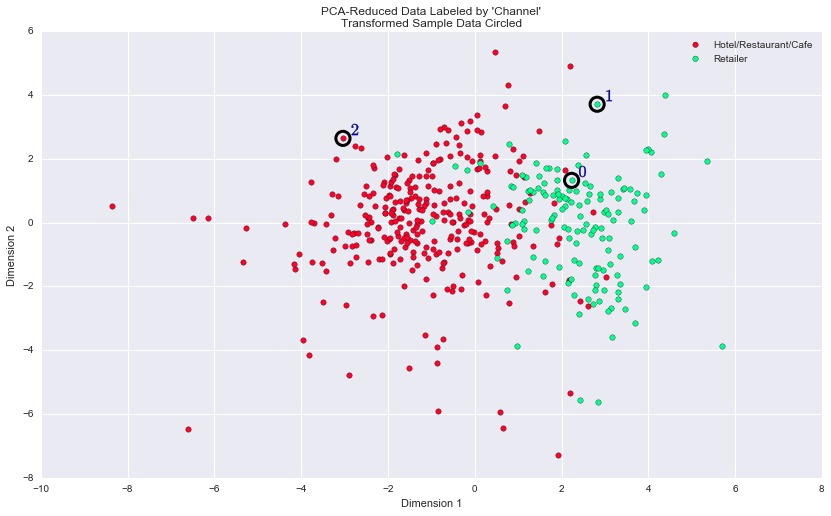

In [45]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:  The clustering algorithm seems to perform fairly well as it recommends to use 2 clusters for grouping customers into. Although there seem to be some disagreement with some of the data points, but the overall result of clustering and alignment is consistent with what I have chosen to compare the data in the begining and matches very similary with previous distribution of Hotel/Restaurant/Cafe customers to Retailers customer. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.